# CSC/XMM validation catalogs

In [57]:
import sys
sys.path.append('../')

In [58]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

import matplotlib.pyplot as plt
# plt.style.use('seaborn')

import seaborn as sns

from scripts.utils import set_mpl, data_path
from scripts.cross_match_scripts import cross_match_data_frames,  add_separation_columns
set_mpl()

%matplotlib inline
from astropy.table import Table

matplotlib settings set


***

In [59]:
ero_df = pd.read_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14.pkl') 
ero_df = ero_df.query('DET_LIKE_0>10')
ero_df.sample(5)

,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH
2876,SRGe J104620.7+542737,161.586203,54.460234,154.161930,54.409256,6.355721,35.558125,1.097423e-14,2.142637e-15,43.401649,8.473846,3613.096191,0.0,0.0,0.0,2744,2185,161.588212,54.458945,2.712572,31.472857,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,0.012012,0.002345,15.519802,161.586203,54.460234,849869200613155968,7.375336,1,0,20.536943,-1.0,0,SDSS J104620.62+542737.8,1.216000,QSO,7.376240,1,1,0,1,16.236,15.263000,12.292,18.7,13.8,2.9,1,3,1,1237657220412342553,0,6.749355,76810009472,2.712572,2.272213,3.430115,5.561802,138.256027,42.340161,8.445101e-15,1.103211e+20
5208,SRGe J105149.9+570018,162.957911,57.005096,150.001734,53.377400,8.402861,16.279182,6.124520e-15,1.560117e-15,28.661751,7.301093,4275.414062,0.0,0.0,0.0,5958,4917,162.959920,57.003807,3.661914,67.982964,0.000008,6.268413e+08,6.270701e+08,0.0,0.0,0.006704,0.001708,20.257540,162.957911,57.005096,-1,-1.000000,0,-1,NaN,-1.0,-1,SDSS J105150.18+570014.3,1.431974,QSO,1.717415,1,1,0,1,16.813,15.634000,12.399,12.3,10.6,2.4,1,2,1,1237658302205723004,9207764044165173248,1.715724,66499363521,3.661914,3.004080,4.534935,7.353227,137.323363,44.912437,4.713056e-15,6.660296e+19
6139,SRGe J104444.4+582700,161.184817,58.449756,149.254168,51.711175,9.601367,11.051376,5.025130e-15,1.523650e-15,23.741611,7.198600,4316.288086,0.0,0.0,0.0,7941,6800,161.186825,58.448467,4.210899,122.496872,0.000009,6.268413e+08,6.270701e+08,0.0,0.0,0.005500,0.001668,18.145111,161.184817,58.449756,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,60947936753,4.210899,3.432554,5.181756,8.402023,135.085573,45.621427,3.867033e-15,7.729115e+19
6228,SRGe J104307.4+545411,160.780918,54.902989,154.040070,53.770780,5.540130,41.529766,4.911624e-15,9.025022e-16,45.254398,8.315414,8417.500977,0.0,0.0,0.0,3579,2853,160.782927,54.901700,2.326958,97.192902,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.005376,0.000988,32.110748,160.780918,54.902989,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,0,0,0,17.538,16.801001,12.580,6.9,4.0,0.5,1,0,-1,0,0,NaN,74967299554,2.326958,1.980634,2.989950,4.848091,137.407813,42.483603,3.779686e-15,8.593088e+19
6226,SRGe J104859.2+583130,162.246832,58.524889,148.564211,52.075156,7.527352,13.888101,4.913140e-15,1.402417e-15,22.991829,6.562836,4275.253418,0.0,0.0,0.0,5581,4580,162.248841,58.523600,3.258229,44.207947,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.005378,0.001535,24.591396,162.246832,58.524889,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,-1,0,0,NaN,60664770133,3.258229,2.691079,4.062432,6.587081,135.696461,45.985323,3.780853e-15,8.195216e+19


In [60]:
# desi_lh.gz_pkl number of sources and area
false_dens_arcmin = 2418574 / (41.729 * 3600)
print(false_dens_arcmin)
false_dens_arcsec = false_dens_arcmin / 3600

print(f'{ false_dens_arcsec:.3f}')

FALSE_PROB = .03



def fsource_r(rho: float, f_thresh: float) -> float:
    """
    The function calculates the radius which corresponds to the probability `f_thresh`
    to FIND one or more false sources. 

    Args:
        rho (float): the density of the false sources (in arcmin^{-2}).
        f_thresh (float): probability to FIND one or more false sources.

    Returns:
        float: radius (in arcsec).
    """

    rho = rho / 3600 # arcmin^{-2} -> arcsec^{-2}
    pf_r = np.sqrt(-1 / (rho * np.pi) * np.log(1 - f_thresh))
    
    return pf_r




r_false = fsource_r(false_dens_arcmin, FALSE_PROB)

print(f'Радиус для {FALSE_PROB:.0%} вероятности найти ложный: {r_false:.2f}"')

desi = pd.read_pickle(data_path+'desi_lh.gz_pkl', compression='gzip')
desi.sample(5)

16.099741453452303
0.004
Радиус для 3% вероятности найти ложный: 1.47"


,release,objid,brickid,ra,dec,flux_g,flux_r,flux_z,flux_w1,flux_w2,flux_w3,flux_w4,flux_ivar_g,flux_ivar_r,flux_ivar_z,flux_ivar_w1,flux_ivar_w2,flux_ivar_w3,flux_ivar_w4,dered_mag_g,dered_mag_r,dered_mag_z,dered_mag_w1,dered_mag_w2,dered_mag_w3,dered_mag_w4,snr_g,snr_r,snr_z,snr_w1,snr_w2,snr_w3,snr_w4,type,parallax,parallax_ivar,pmra,pmra_ivar,pmdec,pmdec_ivar,ref_cat,ref_id,mjd_max,mjd_min,iso_max,iso_min,desi_id
1830026,9011,944,602737,162.185269,55.350275,0.351260,0.202454,0.459669,0.962275,-0.949657,-15.326659,304.37546,506.93268,114.59868,30.518490,4.671374,1.123099,0.001383,0.000018,23.611565,24.217768,23.334705,22.540358,NaN,NaN,16.291407,7.908667,2.167291,2.539376,2.079799,-1.006412,-0.569884,1.280704,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58198.397609,57497.235243,2018-03-21 09:32:33.421,2016-04-19 05:38:45.000,9011_602737_944
414727,9011,3054,616723,158.742678,59.625125,0.269571,0.449884,0.558142,2.905779,0.276379,-10.622293,617.41370,355.18713,148.90396,83.007095,4.266376,1.050712,0.001386,0.000017,23.891024,23.345495,23.120972,21.339994,23.895102,NaN,15.523468,5.080451,5.489766,5.085129,6.001946,0.283300,-0.395482,2.508446,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58190.296253,57842.282463,2018-03-13 07:06:36.231,2017-03-30 06:46:44.821,9011_616723_3054
543884,9011,827,613756,155.624076,58.841146,0.042426,0.280892,1.075646,3.315765,0.385856,-6.363681,812.54990,652.54755,234.91121,111.752570,4.195697,1.083321,0.001460,0.000018,25.901370,23.858744,22.409693,21.196848,23.532898,NaN,15.225291,1.083771,4.305185,11.370983,6.791814,0.401609,-0.243156,3.436686,REX,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.389883,57820.341076,2018-03-17 09:21:25.929,2017-03-08 08:11:09.000,9011_613756_827
738533,9011,485,613774,164.226774,58.702138,0.388663,0.812985,1.290066,0.827275,0.030440,41.398056,147.93805,641.51340,197.10675,159.289030,4.783481,1.109119,0.001199,0.000014,23.503632,22.709682,22.215017,22.704590,26.290606,18.457382,17.074738,9.844110,11.413885,16.281890,1.809348,0.032058,1.433329,0.559558,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58194.407238,57837.299670,2018-03-17 09:46:25.360,2017-03-25 07:11:31.511,9011_613774_485
1974531,9011,3097,598550,162.099474,54.054871,0.217276,0.288593,0.381720,-0.360195,-1.692464,-4.621427,-652.32544,738.35370,224.20909,97.114060,5.090065,1.244431,0.001667,0.000021,24.101757,23.811754,23.524645,NaN,NaN,NaN,NaN,5.903973,4.321286,3.761718,-0.812643,-1.888013,-0.188682,-2.982186,PSF,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,58190.305084,57510.170485,2018-03-13 07:19:19.240,2016-05-02 04:05:29.871,9011_598550_3097


# CSC

In [61]:
csc_df = pd.read_pickle(data_path+'csc_all_lh.pkl')
csc_df.sample(5)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood,likelihood_class,conf_flag,dither_warning_flag,extent_flag,pileup_flag,sat_src_flag,streak_src_flag,var_flag,flux_aper_s,flux_aper_lolim_s,flux_aper_hilim_s,flux_aper_m,flux_aper_lolim_m,flux_aper_hilim_m,radec_err,r_98,flux_05_2,flux_05_2_err,secure
126908,2CXO J105347.3+570124,163.447360,57.023529,7.030275,7.030276,0.000000,1.944444,12.011574,MARGINAL,False,False,False,False,False,False,False,NaN,NaN,NaN,3.205031e-15,1.137269e-15,5.272792e-15,4.061822,11.361523,NaN,NaN,True
114956,2CXO J103449.6+572544,158.707082,57.428917,2.748140,2.094662,58.887177,2.486486,18.966178,TRUE,False,True,False,False,False,False,False,0.000000e+00,0.000000e+00,1.099662e-15,0.000000e+00,0.000000e+00,1.739044e-15,1.411671,3.948655,0.000000e+00,2.057555e-15,False
123146,2CXO J104624.9+584839,161.603991,58.810850,1.010117,0.843531,49.914135,2.810811,27.393100,TRUE,False,False,False,False,False,False,True,7.878935e-16,4.136441e-16,1.162143e-15,0.000000e+00,0.000000e+00,1.274434e-16,0.537641,1.503863,7.878935e-16,5.443960e-16,True
122612,2CXO J104551.0+585502,161.462627,58.917374,2.621253,1.731676,179.991426,1.777778,11.134141,MARGINAL,False,False,False,False,False,False,True,4.741393e-16,1.738511e-16,7.744275e-16,NaN,NaN,NaN,1.283467,3.590050,NaN,NaN,True
126666,2CXO J105245.5+551917,163.189644,55.321597,0.953947,0.786605,93.910856,20.984782,2107.260421,TRUE,False,False,False,False,False,False,False,6.854279e-14,6.221901e-14,7.449458e-14,5.696605e-14,5.242926e-14,6.150285e-14,0.505130,1.412925,1.255088e-13,1.079718e-14,True


## CSC x ERO cross-match

In [62]:
ero_csc_orig = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
 
ero_csc = ero_csc_orig.query("csc_n_near==1 & csc_n_matches==1")

ero_csc = ero_csc.query("csc_secure==True")
print('SECURITY FILTER APPLIED (CSC)')
print('cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source', ero_csc.shape[0])
assert len(ero_csc) == ero_csc.csc_name.nunique()
ero_csc.sample(5)

cross-match radius 30 arcsec
total matches: 777 out of 6885 x 2329
	 total unique pairs: 722
	 total non-unique pairs (duplicates in df2): 55
SECURITY FILTER APPLIED (CSC)
cross-matches: only one csc within 30 arcsec and it is unique for the eROSITA source 461


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches
436,SRGe J105102.1+573819,162.758822,57.638533,149.339047,52.872750,6.878472,31.259359,9.085357e-15,1.844659e-15,43.171535,8.765398,4341.132324,0.0,0.0,0.0,4345,3498,162.760830,57.637244,2.956982,96.739662,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.009945,0.002019,19.362862,162.758822,57.638533,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,1,0,17.021,16.249001,12.308,11.1,6.4,1.1,1,4,1,1237655107835986384,0,1.259178,64037581409,2.956982,2.459100,3.712239,6.019255,136.710881,45.388060,6.991536e-15,7.075303e+19,2CXO J105102.4+573814,162.760215,57.637415,2.137347,2.137345,0.000000,1.837838,11.648947,TRUE,False,False,False,False,False,False,True,0.000000e+00,0.000000e+00,5.043521e-15,0.000000e+00,0.000000e+00,2.935095e-15,1.234876,3.454132,0.000000e+00,5.835400e-15,True,4.838233,1,1
770,SRGe J104640.4+583747,161.668500,58.629856,148.766263,51.781212,7.929179,11.894296,4.335901e-15,1.322536e-15,20.446207,6.236500,4308.052246,0.0,0.0,0.0,8310,7164,161.670509,58.628567,3.443846,84.996231,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.004746,0.001448,18.869539,161.668500,58.629856,-1,-1.000000,0,-1,NaN,-1.0,-1,CLANS 472,2.07000,Galaxy,7.461310,1,1,0,-1,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1237658304353206598,0,6.246238,60271107073,3.443846,2.834735,4.279294,6.938715,135.250478,45.909397,3.336645e-15,7.776344e+19,2CXO J104640.0+583745,161.666946,58.629209,3.088117,2.580403,151.524383,3.794872,32.559415,TRUE,False,False,False,False,False,False,False,0.000000e+00,0.000000e+00,9.040856e-16,1.134054e-15,7.174628e-16,1.527501e-15,1.644081,4.598741,1.134054e-15,1.070383e-15,True,3.730405,1,1
93,SRGe J104921.4+575037,162.339145,57.843575,149.336125,52.569081,3.638937,120.550148,3.528553e-14,3.606089e-15,165.905045,16.955067,4295.468262,0.0,0.0,0.0,583,483,162.341153,57.842285,1.385391,60.713726,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.038623,0.003947,151.826508,162.339145,57.843575,854430348505804160,5.368073,1,0,18.929148,-1.0,0,[VV2006] J104921.5+575037,1.10629,QSO,5.369865,1,1,0,2,15.695,14.714000,11.775,25.8,20.6,4.4,2,2,1,1237658303279464547,1067514230875383808,5.379144,63249828215,1.385391,1.300945,1.963896,3.184383,136.284530,45.439474,2.715359e-14,7.717723e+19,2CXO J104921.5+575036,162.339960,57.843453,3.007594,2.184742,136.148174,3.696970,44.500031,TRUE,False,False,False,False,False,False,False,4.866094e-15,1.677964e-15,8.054225e-15,8.747320e-15,4.790199e-15,1.270444e-14,1.518684,4.247986,1.361341e-14,7.186513e-15,True,1.621976,1,1
223,SRGe J103142.0+573014,157.925090,57.503973,152.160979,50.947726,4.373773,95.341057,1.702253e-14,2.297522e-15,79.233597,10.694119,4252.387695,0.0,0.0,0.0,1788,1405,157.927098,57.502684,1.760302,68.952332,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.018633,0.002515,19.510111,157.925090,57.503973,-1,-1.000000,0,-1,NaN,-1.0,-1,CLASXS 28,0.66400,Seyfert_2,5.940507,1,1,0,0,15.388,15.035000,12.183,29.5,17.4,1.9,1,3,1,1237655108908614349,0,6.481768,64556824421,1.760302,1.563653,2.360479,3.827428,133.713041,43.909194,1.309950e

In [63]:
#simulation attempt with MG
# fig,  ax =  plt.subplots( figsize = (12,12))
# sns.ecdfplot(data = ero_csc, x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
# ax.set_yscale('log')
# fig,  ax =  plt.subplots( figsize = (12,12))
# sns.ecdfplot(data = ero_csc_orig, x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
# ax.set_yscale('log')\

# ax.plot([20,10, 5, 1, 25], [105, 170, 180, 190, 55], 'bo')


# fig,  ax =  plt.subplots( figsize = (12,12))
# sns.ecdfplot(data = ero_csc_orig.query('DET_LIKE_0>15'), x = 'csc_sep', complementary=True, stat='count', color='red', ax = ax)
# ax.set_yscale('log')

# ax.plot([20,10, 5, 1, 25], 0.7*np.array([105, 170, 180, 190, 55]), 'bo')


## CSC x DESI cross-match

In [64]:
csc_desi_all = cross_match_data_frames(ero_csc, desi, colname_ra1 = 'csc_ra',colname_dec1 = 'csc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
csc_desi_all

cross-match radius 15 arcsec
total matches: 2093 out of 461 x 2418574
	 total unique pairs: 2093
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
2,SRGe J110242.6+594120,165.677384,59.688978,145.179791,52.486946,7.653812,211.181183,1.846204e-13,1.864554e-14,134.683884,13.602254,666.474426,0.0,0.0,0.0,679,556,165.679392,59.687689,3.316714,224.252457,0.000026,6.268413e+08,6.270701e+08,0.0,0.0,0.202084,0.020409,3.928642,165.677384,59.688978,860692071522063104,4.485168,1,0,17.027691,-1.0,0,6C 105938+595728,1.830,BLLac,4.485268,1,1,1,1,13.617,12.659,9.803,43.9,47.2,27.9,1,3,1,1237658304891060264,0,3.087692,56364004534,3.316714,2.736290,4.130682,6.697745,136.878443,47.936061,1.420726e-13,6.398279e+19,2CXO J110242.8+594122,165.678600,59.689447,2.291189,2.008557,31.648612,14.313177,629.754672,TRUE,False,False,False,False,False,False,False,1.247590e-13,1.097446e-13,1.397733e-13,9.484644e-14,8.480775e-14,1.048851e-13,1.244794,3.481875,2.196054e-13,2.554235e-14,True,2.779278,1,1,9011,4152,616737,165.678178,59.688774,123.783880,140.066150,194.811190,287.176500,388.446700,1089.463000,2591.550300,53.469475,22.336110,17.090487,1.092097,0.326052,0.001556,0.000019,17.247953,17.120436,16.768284,16.353460,16.025955,14.906816,13.966043,905.142700,661.967900,805.361940,300.109280,221.806760,42.980423,11.174195,PSF,-0.023313,140.88054,-0.008907,94.32313,0.07499,50.308243,G2,860692071522063104,58194.477145,57813.360879,2018-03-17 11:27:05.369,2017-03-01 08:39:39.978,9011_616737_4152,2.540902,7,1
1,SRGe J110242.6+594120,165.677384,59.688978,145.179791,52.486946,7.653812,211.181183,1.846204e-13,1.864554e-14,134.683884,13.602254,666.474426,0.0,0.0,0.0,679,556,165.679392,59.687689,3.316714,224.252457,0.000026,6.268413e+08,6.270701e+08,0.0,0.0,0.202084,0.020409,3.928642,165.677384,59.688978,860692071522063104,4.485168,1,0,17.027691,-1.0,0,6C 105938+595728,1.830,BLLac,4.485268,1,1,1,1,13.617,12.659,9.803,43.9,47.2,27.9,1,3,1,1237658304891060264,0,3.087692,56364004534,3.316714,2.736290,4.130682,6.697745,136.878443,47.936061,1.420726e-13,6.398279e+19,2CXO J110242.8+594122,165.678600,59.689447,2.291189,2.008557,31.648612,14.313177,629.754672,TRUE,False,False,False,False,False,False,False,1.247590e-13,1.097446e-13,1.397733e-13,9.484644e-14,8.480775e-14,1.048851e-13,1.244794,3.481875,2.196054e-13,2.554235e-14,True,2.779278,1,1,9011,4143,616737,165.676791,59.691063,-0.015934,0.072536,0.596225,3.677433,6.544262,-131.121550,-1138.750900,749.922000,238.

In [65]:
csc_desi = csc_desi_all.query("desi_sep<=1.1*csc_r_98") #of you want only sep < r_false and the only one, replace 1.1*csc_r_98 with @r_false
#desi within 1.1*csc_r_98 and the only one
group = csc_desi.groupby('csc_name')['desi_desi_id'].count()
single_idxes = group[group == 1].index
csc_desi = csc_desi[csc_desi['csc_name'].isin(single_idxes)]


#csc_desi = csc_desi_all.query("desi_sep<=@r_false")
csc_desi = csc_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', csc_desi.shape[0])

 

csc_desi['csc_ero_flux_ratio'] = csc_desi['csc_flux_05_2'] / csc_desi['flux_05-20']

csc_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 310


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,csc_name,csc_ra,csc_dec,csc_err_ellipse_r0,csc_err_ellipse_r1,csc_err_ellipse_ang,csc_significance,csc_likelihood,csc_likelihood_class,csc_conf_flag,csc_dither_warning_flag,csc_extent_flag,csc_pileup_flag,csc_sat_src_flag,csc_streak_src_flag,csc_var_flag,csc_flux_aper_s,csc_flux_aper_lolim_s,csc_flux_aper_hilim_s,csc_flux_aper_m,csc_flux_aper_lolim_m,csc_flux_aper_hilim_m,csc_radec_err,csc_r_98,csc_flux_05_2,csc_flux_05_2_err,csc_secure,csc_sep,csc_n_near,csc_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,csc_ero_flux_ratio
49,SRGe J105036.4+575539,162.651673,57.927550,149.049931,52.635737,2.698642,733.415100,7.620850e-14,4.411171e-15,362.212646,20.965929,4342.178711,0.0,0.0,0.0,205,172,162.653682,57.926261,0.851877,0.317897,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.083417,0.004828,20.201599,162.651673,57.927550,854454988734944640,5.416193,2,0,20.213911,-1.0,0,SDSS J105036.42+575538.5,0.23400,QSO,5.429440,2,1,0,0,15.027,14.276,10.887,34.7,27.0,12.2,2,4,0,1237658303279530160,7988318224315076608,5.456943,62929423185,0.851877,0.964783,1.456429,2.361544,136.419001,45.600031,5.864542e-14,7.572343e+19,2CXO J105036.4+575538,162.651746,57.927363,0.754821,0.731760,45.692465,7.161977,324.805662,TRUE,False,False,False,False,False,False,False,3.052691e-14,1.703828e-14,4.330562e-14,3.352118e-14,2.386254e-14,4.261167e-14,0.429496,1.201365,6.404809e-14,2.282904e-14,True,0.689422,1,1,9011,344,611494,162.651774,57.927373,15.364883,32.959960,56.704308,102.292640,113.490710,412.213620,715.94635,160.61800,43.292736,28.138098,1.885203,0.569631,0.001441,0.000019,19.498623,18.681421,18.102753,17.473383,17.361366,15.961931,15.362700,194.727080,216.867370,300.790000,140.450580,85.655870,15.645421,3.086168,SER,1.945884,0.371164,2.465002,0.309075,-0.610118,0.147037,G2,854454984438611968,58194.404310,57438.363252,2018-03-17 09:42:12.399,2016-02-20 08:43:05.000,9011_611494_344,0.066731,7,1,1.092124
364,SRGe J103535.4+575037,158.897297,57.843473,151.233194,51.160840,4.142877,141.509583,2.473667e-14,2.763707e-15,116.589348,13.025953,4305.911133,0.0,0.0,0.0,1063,858,158.899306,57.842184,1.644624,43.777176,0.000007,6.268413e+08,6.270701e+08,0.0,0.0,0.027077,0.003025,19.877886,158.897297,57.843473,-1,-1.000000,0,-1,NaN,-1.0,-1,CLASXS 506,1.06300,AGN,7.835888,1,1,0,0,16.204,15.632,12.564,18.7,10.0,2.3,1,1,0,1237655108908942298,0,6.084005,63250532752,1.644624,1.481107,2.235867,3.625374,134.089927,44.468204,1.903584e-14,5.872526e+19,2CXO J103535.0+575036,158.895992,57.843568,0.939885,0.861439,157.890398,5.028571,103.412980,TRUE,False,False,False,False,False,False,False,2.599571e-15,1.701537e-15,3.450339e-15,2.131918e-15,1.492343e-15,2.735962e-15,0.520861,1.456926,4.731489e-15,1.517958e-15,True,2.523713,1,1,9011,3134,610716,158.895857,57.843440,1.938055,1.817653,1.786720,8.344492,9.788605,75.177720,50.95352,

***

# 4XMM DR10

In [66]:
xmm_df = pd.read_pickle(data_path+'xmm_all_lh.pkl')
xmm_df.sample(5)

,srcid,iauname,sc_ra,sc_dec,sc_poserr,sc_det_ml,sc_ep_1_flux,sc_ep_1_flux_err,sc_ep_2_flux,sc_ep_2_flux_err,sc_ep_3_flux,sc_ep_3_flux_err,sc_ep_4_flux,sc_ep_4_flux_err,sc_ep_5_flux,sc_ep_5_flux_err,sc_ep_8_flux,sc_ep_8_flux_err,sc_ep_9_flux,sc_ep_9_flux_err,sc_ep_8_fmin,sc_ep_8_fmin_err,sc_ep_8_fmax,sc_ep_8_fmax_err,sc_hr1,sc_hr1_err,sc_hr2,sc_hr2_err,sc_hr3,sc_hr3_err,sc_hr4,sc_hr4_err,sc_extent,sc_ext_err,sc_ext_ml,sc_chi2prob,sc_var_flag,sc_sum_flag,mjd_first,mjd_last,sc_fvar,sc_fvarerr,n_detections,confused,webpage_url,flux_05_2,flux_05_2_err,sigma,r_98,secure
256483,206060301010001,4XMM J105703.3+574122,164.263971,57.689461,0.272595,5660.07000,2.170270e-14,8.339390e-16,4.804610e-14,1.273680e-15,3.543430e-14,1.213810e-15,1.851690e-14,1.618170e-15,1.270440e-14,5.498500e-15,1.368980e-13,6.148650e-15,1.319520e-13,2.713940e-15,1.181590e-13,1.052200e-14,2.301520e-13,4.015040e-14,0.325104,0.020474,-0.219643,0.020292,-0.688319,0.024307,-0.551992,0.101174,0.000,NaN,-2.451780,3.536011e-09,True,2,55121.968056,55299.898669,0.412337,0.053752,3,False,http://xmm-catalog.irap.omp.eu/source/20606030...,8.348040e-14,1.759430e-15,0.193310,0.540717,False
255547,201237001010077,4XMM J105322.0+572704,163.341696,57.451354,3.060940,181.65300,4.023000e-16,5.497540e-16,1.063900e-15,7.345810e-16,2.673480e-16,7.154210e-16,9.337460e-17,1.441940e-15,3.891560e-14,2.127710e-14,4.067990e-14,2.137210e-14,9.589660e-16,1.294730e-15,4.067990e-14,2.137210e-14,4.067990e-14,2.137210e-14,0.858136,0.228107,-0.350157,0.384818,0.153528,0.473112,0.876073,0.083452,22.279,1.35685,113.216000,3.774233e-11,True,2,51661.149132,51661.866840,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20123700...,1.331248e-15,1.025396e-15,2.170659,6.071657,False
249613,208223909010046,4XMM J104122.2+575118,160.342598,57.855052,2.648650,8.93037,1.763300e-15,8.203620e-16,1.418870e-15,8.139810e-16,1.469490e-15,9.526750e-16,5.058630e-16,1.188660e-15,8.037550e-15,1.293140e-14,1.682940e-14,1.329380e-14,4.236450e-15,1.888930e-15,1.682940e-14,1.329380e-14,1.682940e-14,1.329380e-14,0.065343,0.328123,-0.194190,0.387340,-0.455825,0.401821,-0.327697,0.666533,0.000,NaN,0.031269,NaN,NaN,0,58441.381088,58441.542685,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20822390...,2.888360e-15,1.253058e-15,1.878284,5.253842,False
254992,201475116010198,4XMM J105205.5+574015,163.023175,57.671028,0.991656,17.34890,1.985090e-16,1.064810e-16,7.555500e-16,1.589400e-16,5.963060e-16,1.694380e-16,2.445690e-16,3.246580e-16,3.540790e-15,2.899930e-15,7.368100e-15,2.997090e-15,2.798990e-15,4.299220e-16,7.343640e-15,4.265290e-15,7.391970e-15,4.212270e-15,0.594721,0.163626,0.107124,0.136245,-0.608542,0.185969,0.754466,0.175839,0.000,NaN,-0.651005,NaN,NaN,0,52605.977025,52613.345764,NaN,NaN,2,False,http://xmm-catalog.irap.omp.eu/source/20147511...,1.351856e-15,2.323169e-16,0.703231,1.967041,True
253743,201475101010040,4XMM J104957.4+572620,162.489511,57.438892,0.655578,178.51500,1.873630e-15,2.865530e-16,3.506810e-15,3.683830e-16,3.180800e-15,4.138450e-16,4.932790e-15,9.795280e-16,1.259580e-14,5.782770e-15,2.650520e-14,5.929240e-15,1.269770e-14,9.485730e-16,2.587030e-14,1.082500e-14,2.677730e-14,7.086880e-15,0.309883,0.083377,-0.038599,0.077604,-0.362345,0.100976,0.101324,0.187619,0.000,NaN,-1.247210,NaN,NaN,1,52562.275475,52565.220567,NaN,NaN,2,False,http://xmm-catalog.irap.omp.eu/source/20147510...,6.687610e-15,5.540521e-16,0.464902,1.300399,True


## XMM x eROSITA cross-match

In [67]:
ero_xmm_orig = cross_match_data_frames(ero_df, xmm_df,
 'RA_fin', 'DEC_fin', 'sc_ra', 'sc_dec', match_radius = 30, df_prefix = 'xmm')
 
ero_xmm = ero_xmm_orig.query("xmm_n_near==1 & xmm_n_matches==1")
ero_xmm = ero_xmm.query("xmm_secure==True")
print('SECURITY FILTER APPLIED (XMM)')

ero_xmm = ero_xmm.query("xmm_secure==True")
print('cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source', ero_xmm.shape[0])
assert len(ero_xmm) == ero_xmm.xmm_srcid.nunique()
ero_xmm.sample(5)

cross-match radius 30 arcsec
total matches: 839 out of 6885 x 1791
	 total unique pairs: 817
	 total non-unique pairs (duplicates in df2): 22
SECURITY FILTER APPLIED (XMM)
cross-matches: only one xmm within 30 arcsec and it is unique for the eROSITA source 646


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches
228,SRGe J103629.4+580311,159.122550,58.053039,150.852465,51.126863,4.601328,105.136253,1.822428e-14,2.311853e-15,86.018318,10.911907,4312.091309,0.0,0.0,0.0,1535,1216,159.124558,58.051749,1.872895,167.013184,0.000008,6.268413e+08,6.270701e+08,0.0,0.0,0.019948,0.002531,18.672869,159.122550,58.053039,854835071864672256,7.862308,1,0,20.466410,-1.0,0,SDSS J103629.26+580312.3,1.162600,QSO,7.877899,1,1,0,1,16.766001,15.648,12.136,13.5,10.5,1.9,1,1,1,1237658304352551252,9215627201621544960,7.876257,62449979881,1.872895,1.645006,2.483288,4.026558,134.079692,44.709355,1.402430e-14,5.962523e+19,205562110010009,4XMM J103629.2+580313,159.121946,58.053651,1.113730,97.2530,4.175210e-15,1.033780e-15,5.072530e-15,1.121720e-15,7.875290e-15,1.559620e-15,4.066840e-15,2.048330e-15,1.032080e-21,8.228620e-15,2.056840e-14,8.798510e-15,2.078440e-14,2.976010e-15,2.056840e-14,8.798510e-15,2.056840e-14,8.798510e-15,0.044893,0.164283,0.196187,0.138186,-0.644404,0.138426,-1.000000,0.732848,0.0,NaN,-1.208210,NaN,NaN,0,54790.704919,54790.786331,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,1.294782e-14,1.921112e-15,0.789799,2.209186,True,2.484839,1,1
753,SRGe J105631.0+573708,164.129230,57.618848,148.525287,53.420950,8.577944,15.339711,5.543155e-15,1.553459e-15,23.670603,6.633646,3901.214355,0.0,0.0,0.0,6843,5738,164.131239,57.617558,3.742340,146.245331,0.000010,6.268413e+08,6.270701e+08,0.0,0.0,0.006067,0.001700,15.900247,164.129230,57.618848,857194043997898624,5.208768,1,0,20.917603,-1.0,0,SDSS J105631.43+573708.4,1.517782,QSO,5.207920,1,1,0,1,15.901000,14.730,12.515,21.0,19.7,2.8,1,1,1,1237655107299377295,9207795380246564864,5.221720,64113476299,3.742340,3.066673,4.629426,7.506440,137.605296,45.771245,4.265674e-15,6.427394e+19,206060301010017,4XMM J105631.4+573708,164.130939,57.619148,0.661663,113.3570,2.368340e-15,3.945710e-16,4.621810e-15,5.501630e-16,4.287350e-15,5.683990e-16,3.483170e-15,9.610100e-16,9.511670e-15,6.244040e-15,2.605180e-14,6.428420e-15,1.396510e-14,1.210090e-15,2.024910e-14,9.725930e-15,3.121890e-14,1.065930e-14,0.202540,0.087906,-0.027244,0.087098,-0.535562,0.105326,-0.084756,0.263475,0.0,NaN,-0.084091,0.302431,False,1,55121.968056,55299.898669,0.263394,0.412646,3,False,http://xmm-catalog.irap.omp.eu/source/20606030...,8.909160e-15,7.910479e-16,0.469217,1.312470,True,3.466875,1,1
433,SRGe J104846.6+583019,162.194369,58.505194,148.617940,52.068231,5.635663,39.862373,1.097649e-14,1.970723e-15,51.564808,9.257967,4291.781250,0.0,0.0,0.0,3069,2445,162.196378,58.503904,2.372463,78.759941,0.000003,6.268413e+08,6.270701e+08,0.0,0.0,0.012015,0.002157,23.514599,162.194369,58.505194,854542464332322560,7.612855,1,0,20.573309

## XMM x DESI cross-match

In [68]:
xmm_desi_all = cross_match_data_frames(ero_xmm, desi, colname_ra1 = 'xmm_sc_ra',colname_dec1 = 'xmm_sc_dec' , colname_ra2 = 'ra', colname_dec2=  'dec', match_radius = 15, df_prefix = 'desi')
xmm_desi_all

cross-match radius 15 arcsec
total matches: 2831 out of 646 x 2418574
	 total unique pairs: 2831
	 total non-unique pairs (duplicates in df2): 0


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches
5,SRGe J104117.7+584929,160.323629,58.824642,149.266632,51.126914,2.166339,3391.888916,2.361506e-13,7.471780e-15,1120.011108,35.437035,4332.920898,0.0,0.0,0.0,38,27,160.325638,58.823353,0.454968,97.643723,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.258489,0.008179,18.102430,160.323629,58.824642,-1,-1.00000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,1,0,15.243,15.129,12.821,31.5,15.9,-0.2,1,3,0,1237658304889815429,0,2.181367,59543516327,0.454968,0.774481,1.169150,1.895733,134.256532,45.696772,1.817271e-13,7.704875e+19,205562112010003,4XMM J104117.9+584929,160.324685,58.824762,0.817968,742.578,2.808530e-14,3.382310e-15,4.008580e-14,4.210150e-15,4.761820e-14,4.978040e-15,5.426170e-14,9.520310e-15,8.843220e-15,2.233210e-14,1.909300e-13,2.733320e-14,1.567980e-13,1.062820e-14,1.909300e-13,2.733320e-14,1.909300e-13,2.733320e-14,0.136026,0.075853,0.023020,0.072849,-0.437121,0.081245,-0.896701,0.157718,0.0,NaN,-2.276850,0.425014,False,0,54595.266366,54595.352928,0.012697,1.426367,1,False,http://xmm-catalog.irap.omp.eu/source/20556211...,8.770400e-14,6.519681e-15,0.580060,1.622515,True,2.015272,1,1,9011,43,613766,160.324219,58.824639,-0.052349,0.298325,1.900912,2.352417,2.387243,53.370483,2019.36580,671.00964,212.87097,70.456120,2.689567,0.915560,0.001440,0.000018,NaN,23.799402,21.794834,21.570036,21.554535,18.181593,14.236904,-1.356040,4.352592,15.955904,3.857940,2.284231,2.025409,8.467377,PSF,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,NaN,0,58194.398524,57851.315637,2018-03-17 09:33:52.450,2017-04-08 07:34:31,9011_613766_43,0.975167,9,1
6,SRGe J104117.7+584929,160.323629,58.824642,149.266632,51.126914,2.166339,3391.888916,2.361506e-13,7.471780e-15,1120.011108,35.437035,4332.920898,0.0,0.0,0.0,38,27,160.325638,58.823353,0.454968,97.643723,0.000006,6.268413e+08,6.270701e+08,0.0,0.0,0.258489,0.008179,18.102430,160.323629,58.824642,-1,-1.00000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,1,0,15.243,15.129,12.821,31.5,15.9,-0.2,1,3,0,1237658304889815429,0,2

In [69]:
xmm_desi = xmm_desi_all.query("desi_sep<=1.1*xmm_r_98") #of you want only sep < r_false and the only one, replace 1.1*xmm_r_98 with @r_false
#desi within 1.1*xmm_r_98 and the only one
group = xmm_desi.groupby('xmm_srcid')['desi_desi_id'].count()
single_idxes = group[group == 1].index
xmm_desi = xmm_desi[xmm_desi['xmm_srcid'].isin(single_idxes)]


#xmm_desi = xmm_desi_all.query("desi_sep<=@r_false")
xmm_desi = xmm_desi.query("desi_sep<=@r_false")

print('cross-matches: only one desi within r_false and it is unique', xmm_desi.shape[0])

 

xmm_desi['xmm_ero_flux_ratio'] = xmm_desi['xmm_flux_05_2'] / xmm_desi['flux_05-20']

xmm_desi.sample(5)


cross-matches: only one desi within r_false and it is unique 383


,srcname_fin,RA_fin,DEC_fin,GLON,GLAT,pos_r98,DET_LIKE_0,ML_FLUX_0,ML_FLUX_ERR_0,ML_CTS_0,ML_CTS_ERR_0,ML_EXP_1,EXT,EXT_LIKE,EXT_ERR,ID_SRC,ID_CLUSTER,RA,DEC,RADEC_ERR,DIST_NN,SRCDENS,TSTART,TSTOP,EXT_LOWERR,EXT_UPERR,ML_RATE_0,ML_RATE_ERR_0,ML_BKG_0,RA_corr,DEC_corr,g_id,g_d2d,g_nsrc,g_s,g_gmag,g_maxLx,g_b,s_id,s_z,s_otype,s_d2d,s_nsrc,flag_xray,flag_radio,flag_agn_wise,w1,w2,w3,w1snr,w2snr,w3snr,w_nsrc,sdss_nsrc,sdss_p,sdss_id,sdss_sp,sdss_d2d,hpidx,RADEC_ERR_fin,pos_sigma_2d,pos_r68,pos_r95,ELON,ELAT,flux_05-20,NH,xmm_srcid,xmm_iauname,xmm_sc_ra,xmm_sc_dec,xmm_sc_poserr,xmm_sc_det_ml,xmm_sc_ep_1_flux,xmm_sc_ep_1_flux_err,xmm_sc_ep_2_flux,xmm_sc_ep_2_flux_err,xmm_sc_ep_3_flux,xmm_sc_ep_3_flux_err,xmm_sc_ep_4_flux,xmm_sc_ep_4_flux_err,xmm_sc_ep_5_flux,xmm_sc_ep_5_flux_err,xmm_sc_ep_8_flux,xmm_sc_ep_8_flux_err,xmm_sc_ep_9_flux,xmm_sc_ep_9_flux_err,xmm_sc_ep_8_fmin,xmm_sc_ep_8_fmin_err,xmm_sc_ep_8_fmax,xmm_sc_ep_8_fmax_err,xmm_sc_hr1,xmm_sc_hr1_err,xmm_sc_hr2,xmm_sc_hr2_err,xmm_sc_hr3,xmm_sc_hr3_err,xmm_sc_hr4,xmm_sc_hr4_err,xmm_sc_extent,xmm_sc_ext_err,xmm_sc_ext_ml,xmm_sc_chi2prob,xmm_sc_var_flag,xmm_sc_sum_flag,xmm_mjd_first,xmm_mjd_last,xmm_sc_fvar,xmm_sc_fvarerr,xmm_n_detections,xmm_confused,xmm_webpage_url,xmm_flux_05_2,xmm_flux_05_2_err,xmm_sigma,xmm_r_98,xmm_secure,xmm_sep,xmm_n_near,xmm_n_matches,desi_release,desi_objid,desi_brickid,desi_ra,desi_dec,desi_flux_g,desi_flux_r,desi_flux_z,desi_flux_w1,desi_flux_w2,desi_flux_w3,desi_flux_w4,desi_flux_ivar_g,desi_flux_ivar_r,desi_flux_ivar_z,desi_flux_ivar_w1,desi_flux_ivar_w2,desi_flux_ivar_w3,desi_flux_ivar_w4,desi_dered_mag_g,desi_dered_mag_r,desi_dered_mag_z,desi_dered_mag_w1,desi_dered_mag_w2,desi_dered_mag_w3,desi_dered_mag_w4,desi_snr_g,desi_snr_r,desi_snr_z,desi_snr_w1,desi_snr_w2,desi_snr_w3,desi_snr_w4,desi_type,desi_parallax,desi_parallax_ivar,desi_pmra,desi_pmra_ivar,desi_pmdec,desi_pmdec_ivar,desi_ref_cat,desi_ref_id,desi_mjd_max,desi_mjd_min,desi_iso_max,desi_iso_min,desi_desi_id,desi_sep,desi_n_near,desi_n_matches,xmm_ero_flux_ratio
871,SRGe J104406.2+593052,161.025872,59.514320,148.063753,50.945171,4.616266,87.295403,1.759759e-14,2.373848e-15,84.100410,11.344826,4366.088379,0.0,0.0,0.0,1719,1356,161.027881,59.513031,1.880244,71.309166,0.000004,6.268413e+08,6.270701e+08,0.0,0.0,0.019262,0.002598,27.101175,161.025872,59.514320,-1,-1.000000,0,-1,NaN,-1.0,-1,NaN,NaN,NaN,-1.000000,0,1,0,0,15.990000,15.413000,12.400,21.9,11.7,2.1,1,1,0,1237653616934256862,0,5.099883,57000349208,1.880244,1.650346,2.491350,4.039630,134.154694,46.471484,1.354203e-14,9.382747e+19,205562129010012,4XMM J104406.2+593051,161.026213,59.514395,1.173910,81.5224,1.904200e-15,6.891300e-16,3.914660e-15,9.924140e-16,2.152040e-15,8.920540e-16,3.166340e-15,2.006430e-15,1.877130e-14,1.073290e-14,3.593770e-14,1.132220e-14,1.529470e-14,2.589080e-15,3.593770e-14,1.132220e-14,3.593770e-14,1.132220e-14,0.042392,0.172489,-0.018346,0.182492,-0.374413,0.191417,-0.199292,0.282924,0.0,NaN,-1.286500,NaN,NaN,0,54797.077187,54797.181748,NaN,NaN,1,False,http://xmm-catalog.irap.omp.eu/source/20556212...,6.066700e-15,1.334408e-15,0.832476,2.328559,True,0.679302,1,1,9011,1293,615996,161.026512,59.514273,3.252181,4.706741,8.915024,37.239307,33.028847,111.965645,769.02386,653.22314,185.68968,57.311554,3.265706,0.929588,0.001118,0.000013,21.184494,20.794575,20.111480,18.570488,18.701534,17.377026,15.285051,83.119980,64.137825,67.490650,67.296135,31.844807,3.743409,2.810399,REX,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,NaN,0,58194.413159,57846.199361,2018-03-17 09:54:56.929,2017-04-03 04:47:04.770,9011_615996_1293,0.699613,4,1,0.447991
1147,SRGe J104919.2+584702,162.330178,58.783853,148.207171,51.931522,4.962894,64.760391,1.443425e-14,2.179541e-15,68.730721,10.378190,4350.148926,0.0,0.0,0.0,2231,1756,162.332187,58.782564,2.049484,233.897552,0.000011,6.268413e+08,6.270701e+08,0.0,0.0,0.015800,0.002386,17.239521,162.330178,58.783853,-1,-1.000000,0,-1,NaN,-1.0,-1,2XMM J104919.6+584702,2.368,QSO,4.457020,1,1,0,-1

## Cross-correlate eROSITA with XMM and Chandra

so that for every eROSITA source we have a number of neighbors in XMM and Chandra. 

In [70]:
ero_csc_n_neigh = cross_match_data_frames(ero_df, csc_df,
 'RA_fin', 'DEC_fin', 'ra', 'dec', match_radius = 30, df_prefix = 'csc')
n_chandra_dict = dict(ero_csc_n_neigh.groupby('srcname_fin')['csc_sep'].count())

ero_xmm_n_neigh = cross_match_data_frames(ero_df, xmm_df,
    'RA_fin', 'DEC_fin', 'sc_ra', 'sc_dec', match_radius = 30, df_prefix = 'xmm')
n_xmm_dict = dict(ero_xmm_n_neigh.groupby('srcname_fin')['xmm_sep'].count())

cross-match radius 30 arcsec
total matches: 777 out of 6885 x 2329
	 total unique pairs: 722
	 total non-unique pairs (duplicates in df2): 55
cross-match radius 30 arcsec
total matches: 839 out of 6885 x 1791
	 total unique pairs: 817
	 total non-unique pairs (duplicates in df2): 22


# Joining CSC and XMM counterparts

In [71]:
csc_ctps = csc_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'csc_sep', 'csc_name',   'csc_ra', 'csc_dec', 'csc_flux_05_2', 'csc_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'csc_ero_flux_ratio']]

xmm_ctps = xmm_desi[['srcname_fin', 'RA_fin','DEC_fin', 'DET_LIKE_0', 'pos_r98', 'pos_sigma_2d', 'flux_05-20', 'xmm_sep', 'xmm_srcid',   'xmm_sc_ra', 'xmm_sc_dec', 'xmm_flux_05_2', 'xmm_r_98', 'desi_sep', 'desi_desi_id',  'desi_ra', 'desi_dec', 'xmm_ero_flux_ratio']]

csc_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)
xmm_ctps.rename(columns = {'desi_desi_id':'desi_id'}, inplace = True)

In [72]:
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

XMM companions 383
CSC companions 310
Total companions possible 693


In [73]:
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] <  5 ]
xmm_ctps = xmm_ctps[xmm_ctps['xmm_ero_flux_ratio'] >  1/5 ]

csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] <  5 ]
csc_ctps = csc_ctps[csc_ctps['csc_ero_flux_ratio'] >  1/5 ]

In [74]:
xmm_ctps = xmm_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0', 'desi_id', 'desi_ra', 'desi_dec']]
csc_ctps = csc_ctps[['srcname_fin', 'RA_fin', 'DEC_fin', 'pos_sigma_2d', 'flux_05-20', 'DET_LIKE_0','desi_id', 'desi_ra', 'desi_dec']]
xmm_ctps['x_ray_det'] = 'xmm'
csc_ctps['x_ray_det'] = 'csc'
print('After Flux filter')
print('XMM companions', xmm_ctps.shape[0])
print('CSC companions', csc_ctps.shape[0])
print('Total companions possible', xmm_ctps.shape[0] + csc_ctps.shape[0])

After Flux filter
XMM companions 374
CSC companions 235
Total companions possible 609


In [75]:
final_ctps = pd.concat([xmm_ctps, csc_ctps])

final_ctps['n_csc_neigh'] = final_ctps['srcname_fin'].map(n_chandra_dict, na_action='ignore')
final_ctps['n_xmm_neigh'] = final_ctps['srcname_fin'].map(n_xmm_dict, na_action='ignore')
final_ctps['n_xmm_neigh'] = final_ctps['n_xmm_neigh'].fillna(0)
final_ctps['n_csc_neigh'] = final_ctps['n_csc_neigh'].fillna(0)

#final_ctps = pd.concat([csc_ctps])
#final_ctps = pd.concat([xmm_ctps])
final_ctps.sort_values(by='srcname_fin', inplace=True)
final_ctps.reset_index(drop=True, inplace=True)


n_ctps = final_ctps.groupby('srcname_fin')['x_ray_det'].transform(lambda x: len(x.unique())) 
final_ctps['n_x_ray_det'] = n_ctps

n_desi_ctps = final_ctps.groupby('srcname_fin')['desi_id'].transform(lambda x: len(x.unique()))
final_ctps['n_desi_ctps'] = n_desi_ctps


final_ctps = final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )')
## final_ctps.query('( n_x_ray_det == 1 ) | ( n_x_ray_det==2 & n_desi_ctps == 1 )') - opposite of this


final_ctps.drop_duplicates(subset=['srcname_fin', 'desi_id'], inplace=True)


final_ctps = add_separation_columns(final_ctps, colname_ra1 = 'RA_fin', colname_dec1 = 'DEC_fin', colname_ra2 = 'desi_ra', colname_dec2 = 'desi_dec', colname = 'sep_ero_desi')
print('After merging XMM and CSC and deleting duplicates we have ', final_ctps.shape[0], ' sources')
final_ctps

After merging XMM and CSC and deleting duplicates we have  548  sources


,srcname_fin,RA_fin,DEC_fin,pos_sigma_2d,flux_05-20,DET_LIKE_0,desi_id,desi_ra,desi_dec,x_ray_det,n_csc_neigh,n_xmm_neigh,n_x_ray_det,n_desi_ctps,sep_ero_desi
0,SRGe J103105.9+573747,157.774385,57.629820,2.927322,3.362480e-15,10.766065,9011_610714_1440,157.774282,57.630173,csc,1.0,0.0,1,1,1.288998
1,SRGe J103123.8+574309,157.849052,57.719110,1.194977,2.582066e-14,241.302124,9011_610714_2092,157.848257,57.719498,csc,1.0,0.0,1,1,2.070640
2,SRGe J103130.8+573932,157.878489,57.658958,3.460543,4.648196e-15,16.483074,9011_610714_2412,157.880032,57.659682,csc,1.0,0.0,1,1,3.952662
3,SRGe J103137.0+573159,157.904134,57.532955,2.291806,7.812335e-15,37.274281,9011_609939_1093,157.904358,57.533253,csc,1.0,0.0,1,1,1.154828
4,SRGe J103143.5+573156,157.931232,57.532161,2.144571,1.160345e-14,61.354324,9011_609939_1343,157.930621,57.532696,csc,1.0,0.0,1,1,2.261288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,SRGe J110557.9+590029,166.491399,59.007971,6.738420,7.910556e-15,11.879989,9011_614527_74,166.492254,59.009188,csc,1.0,0.0,1,1,4.660088
605,SRGe J110609.1+585708,166.537967,58.952247,2.832658,7.721901e-15,12.917166,9011_614527_461,166.538636,58.952817,csc,1.0,0.0,1,1,2.398998
606,SRGe J110612.0+585212,166.550064,58.869999,1.412324,3.952924e-14,159.248337,9011_613778_3747,166.549616,58.870461,csc,1.0,0.0,1,1,1.859036
607,SRGe J110614.9+585347,166.562283,58.896277,2.956780,6.742923e-15,11.506282,9011_614527_601,166.560542,58.897072,csc,1.0,0.0,1,1,4.321613


In [76]:
final_ctps = final_ctps.query(" ( (n_csc_neigh==0 & n_xmm_neigh==1) | (n_csc_neigh==1 & n_xmm_neigh==0) | (n_csc_neigh==1 & n_xmm_neigh==1) )")
print('After removing sources with more than one X-ray neighbor we have ', final_ctps.shape[0], ' sources')

After removing sources with more than one X-ray neighbor we have  529  sources


In [77]:
#SRGe J105817.5+564621 is in the galaxy cluster -> should be deleted, sep/err = 3.6
#SRGe J105322.7+571514 second source within r98 of csc -> it is an 'xmm' detection, which is out of frame. Chandra detection is much closer to the erosita, but fails the condition of being the only one DESI within r98. -> should be deleted, sep/err = 7.963218
#SRGe J103426.1+575524 - two different ctps in csc and xmm - two CSC nearby, and only one XMM nearby, unclear what is a real detection, sep/err = 5.046855
#drop_srcids = ['SRGe J105817.5+564621', 'SRGe J105322.7+571514', 'SRGe J103426.1+575524']
# final_ctps.query('sep_ero_desi/pos_sigma_2d>3')[['srcname_fin', 'DET_LIKE_0', 'sep_ero_desi', 'pos_sigma_2d', 'flux_05-20']]


# #save final_ctps_csv to csv
final_ctps_csv = final_ctps[['srcname_fin', 'desi_id']]
final_ctps_csv.rename(columns={'desi_id':'desi_id_true'}, inplace=True)
final_ctps_csv.to_csv(data_path+'validation_ctps_ero_desi_lh_no_hostless.csv', index=False)

final_ctps

,srcname_fin,RA_fin,DEC_fin,pos_sigma_2d,flux_05-20,DET_LIKE_0,desi_id,desi_ra,desi_dec,x_ray_det,n_csc_neigh,n_xmm_neigh,n_x_ray_det,n_desi_ctps,sep_ero_desi
0,SRGe J103105.9+573747,157.774385,57.629820,2.927322,3.362480e-15,10.766065,9011_610714_1440,157.774282,57.630173,csc,1.0,0.0,1,1,1.288998
1,SRGe J103123.8+574309,157.849052,57.719110,1.194977,2.582066e-14,241.302124,9011_610714_2092,157.848257,57.719498,csc,1.0,0.0,1,1,2.070640
2,SRGe J103130.8+573932,157.878489,57.658958,3.460543,4.648196e-15,16.483074,9011_610714_2412,157.880032,57.659682,csc,1.0,0.0,1,1,3.952662
3,SRGe J103137.0+573159,157.904134,57.532955,2.291806,7.812335e-15,37.274281,9011_609939_1093,157.904358,57.533253,csc,1.0,0.0,1,1,1.154828
4,SRGe J103143.5+573156,157.931232,57.532161,2.144571,1.160345e-14,61.354324,9011_609939_1343,157.930621,57.532696,csc,1.0,0.0,1,1,2.261288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,SRGe J110557.9+590029,166.491399,59.007971,6.738420,7.910556e-15,11.879989,9011_614527_74,166.492254,59.009188,csc,1.0,0.0,1,1,4.660088
605,SRGe J110609.1+585708,166.537967,58.952247,2.832658,7.721901e-15,12.917166,9011_614527_461,166.538636,58.952817,csc,1.0,0.0,1,1,2.398998
606,SRGe J110612.0+585212,166.550064,58.869999,1.412324,3.952924e-14,159.248337,9011_613778_3747,166.549616,58.870461,csc,1.0,0.0,1,1,1.859036
607,SRGe J110614.9+585347,166.562283,58.896277,2.956780,6.742923e-15,11.506282,9011_614527_601,166.560542,58.897072,csc,1.0,0.0,1,1,4.321613


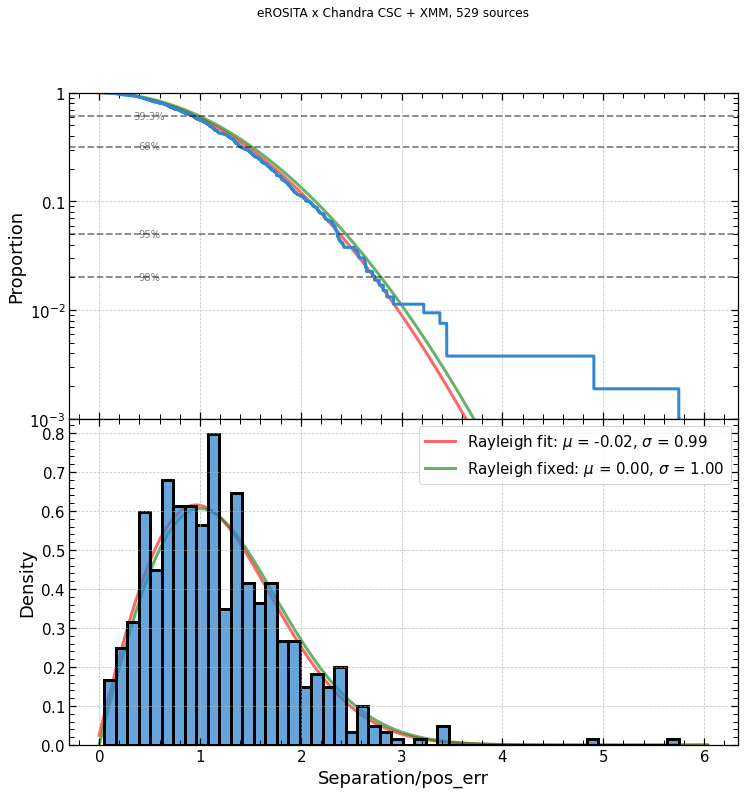

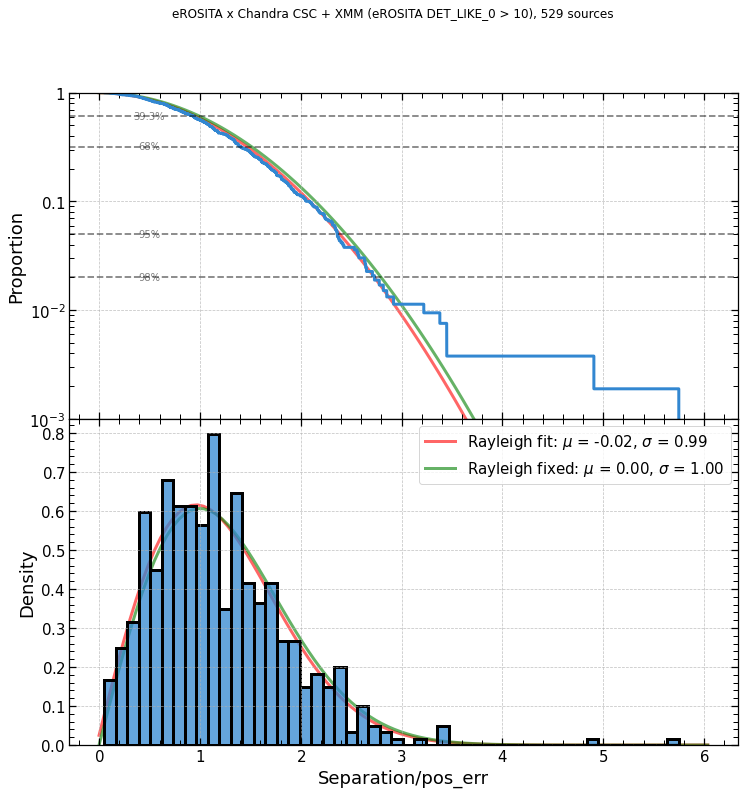

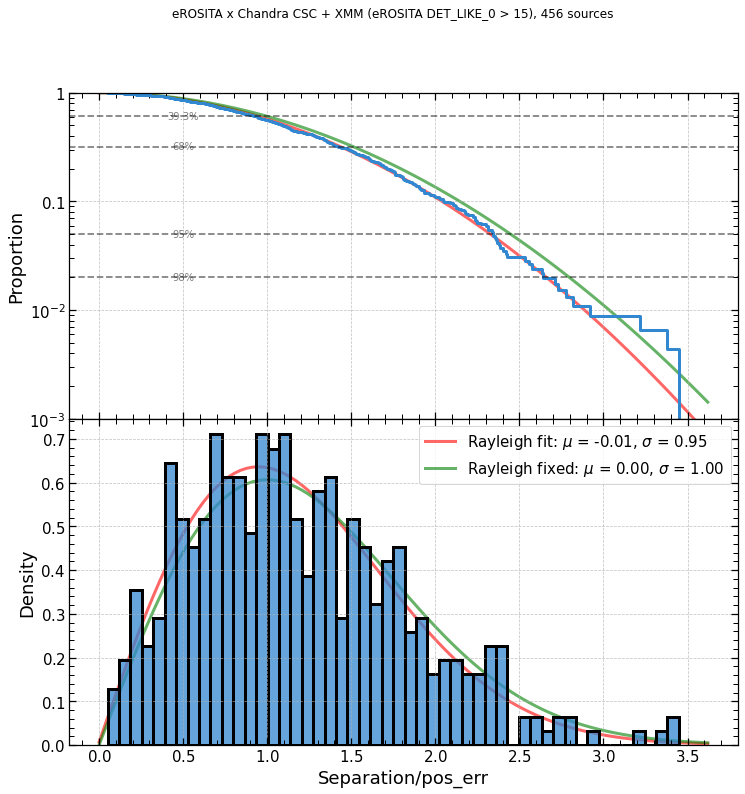

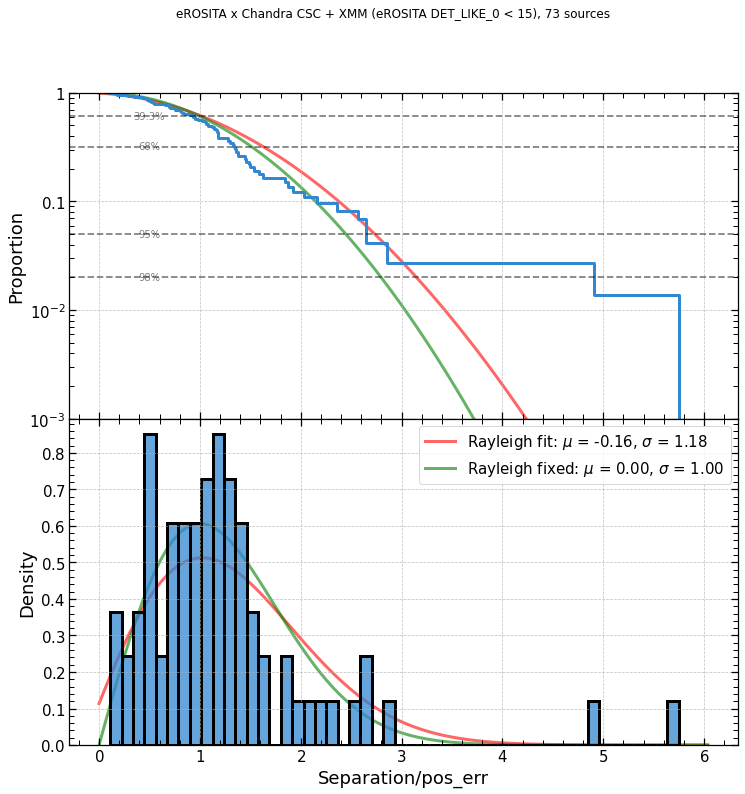

In [80]:
from scripts.cross_match_scripts import rayleigh_plot

rayleigh_plot(final_ctps, sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM')
rayleigh_plot(final_ctps.query('DET_LIKE_0>10'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 > 10)')
rayleigh_plot(final_ctps.query('DET_LIKE_0>15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 > 15)')
rayleigh_plot(final_ctps.query('DET_LIKE_0<15'), sep_col='sep_ero_desi', pos_err_col = 'pos_sigma_2d', plotlabel='eROSITA x Chandra CSC + XMM (eROSITA DET_LIKE_0 < 15)')

## distribution over separations

In [79]:
# %matplotlib inline
# query = 'DET_LIKE_0>6'
# seps = final_ctps.query(query)['sep_ero_desi']
# sep_bins = np.linspace(0, 30, 300)

# sep_hist, bin_edges = np.histogram(seps, bins=sep_bins)
# sep_hist = np.cumsum(sep_hist)
# hist_area = sep_hist
# sep_axis = (bin_edges[1:] + bin_edges[:-1])/2
# fig,  ax =  plt.subplots( figsize = (12,12))

# #ax.bar(sep_axis, hist_area, width = 1, alpha = 0.4)
# sns.ecdfplot(seps, color='k', ax = ax, stat='count', log_scale=False, label = 'Data, '+query , complementary=True)
# ax.set_xlabel('S - Separation, arcsec')
# ax.set_ylabel('Number of companions within Separation<S')


# from scipy.optimize import curve_fit
# from scipy import stats
# def gaus_cdf(x,N,sep0,sep_sigma):
#     #return N*stats.norm.cdf(x, loc=sep0, scale=sep_sigma)
#     return N*(1-stats.rayleigh.cdf(x, loc=sep0, scale=sep_sigma))

# def linear_cdf(x,a):
#     #b = -60*a
#     #return a*x**2+b*x
#     #return a*x**2
#     return a *(30**2-x**2)

# def model_cdf(x, N, sep0, sep_sigma, a):
#     return gaus_cdf(x,N,sep0,sep_sigma)  + linear_cdf(x,a)

# #popt, pcov = curve_fit(model_cdf, sep_axis, hist_area, p0=[1, 1, 2,  0])
# #print(popt)
# popt = [120, 0,  3.4, 0.9e-2]
# x = np.linspace(0, 29, 100)
# ax.plot(x, model_cdf(x, *popt), 'C0--', label = 'Rayleigh cdf + linear cdf')
# ax.plot(x, gaus_cdf(x, *popt[:3]), 'C1--', label = 'Rayleigh cdf')
# ax.plot(x, linear_cdf(x, *popt[3:]), 'C2--', label = 'linear cdf')
# ax.legend()
# #n_false  =linear_cdf(30, *popt[3:])
# #ax.axhline(n_false, color='g', linestyle=':')
# #ax.text(10, n_false+n_false/2, 'Number of false companions = {:.0f}'.format(n_false),  va='top', ha='left', fontsize = 19)

# #print('Number of false companions', n_false)
# ax.set_yscale('log')
# ax.set_ylim(0.9, 700)
# plt.show()
